### Описание решаемой задачи

Согласно данным ассоциации безопасного вождения [1] (Association for Safe International Road Travel - ASIRT) каждый год в автомобильных авариях гибнет около 1.3 млн. человек (3287 в день) и около 20-50 миллионов становятся инвалидами. Среди прочих причин смертности автомобильные аварии являются 9 по счету, составляя 2.2% среди всего населения и больше 50% среди молодых людей возраста 15-29 лет. Затраты, связанные с автомобильными авариями, стоят некоторым странам 1-2% их годового ВВП. Анализ факторов, приводящих к летальности, может помочь выработать меры предупреждения летальных исходов.

В данном проекте решается задача предсказания степени повреждений, полученных человеком, попавшим в автомобильную аварию (летальная и нелетальная - бинарная классификация). В качестве исходных данных используется dataset, составленный департаментом транспорта Англии [2] (Department for Transport). Датасет состоит из данных, собранных полицией Англии по всем автомобильным авариям. Форма, заполяемая полицией, называется Stats19 [3] и состоит из трех частей:
* Общая информация об аварии - дата, время, место, видимость и пр.
* Отдельная форма на каждый автомобиль, попавший в аварию - тип автомобиля, информация о водителе и др.
* Отдельная форма на каждого пострадавшего - степень тяжести повреждений, в каком автомобиле находился, был ли пассажиром или водителем и др.  


Более подробное описание признаков - ниже. Так как признаков много, будет описана только та их часть, которая использовалась в дальнейшем анализе. Расшифровка некоторых признаков бралась из [4].

Ссылки:  
[1] http://asirt.org/initiatives/informing-road-users/road-safety-facts/road-crash-statistics    
[2] https://www.kaggle.com/silicon99/dft-accident-data  
[3] http://mast.roadsafetyanalysis.org/wiki/index.php?title=STATS19  
[4]https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/259012/rrcgb-quality-statement.pdf

### Описание признаков 

#### Общая информация об аварии - файл Accidents0515.csv

__Общая информация__:
* Accident_Index - индивидуальный номер аварии 
* Accident_Severity - серьезность аварии аварии (1 - фатальная, 2 - серьезная, 3 - легкая)  
* Number_of_Vehicles - число автомобилей (1-67)  
* Number_of_Casualties - число пострадавших (1-93)  
* Date - дата в формате MM/DD/YYYY  
* Day_of_Week - день недели (1 - воскресенье, 7 - суббота)  
* Time - время аварии  

__Характеристика дорог__:

* 1st_Road_Class - тип 1-ой дороги (1 - автомагистраль, 2 - A + автомагистраль, 3 - A, 4 - B, 5 - C, 6  - неклассифицированная дорога)  
* Road_Type - тип движения (1 - кольцевое, 2 - односторонее, 3 - двусторонее, с разграниченными полосами, 6 - двусторонее с общей полосой, 7 - скользкая дорога, 9 - неизвестно, 12 - односторонняя и скользкая дорога)  
* Speed_limit - ограничение скорости [mph]  
* Junction_Detail - характеристика перекрестка (0 - нет перекрестка, 1 - круговое движение, 2 - миникольцо (используется для саморегуляции перекрестков), 3 - Т-образный перекресток, 5 - скользкая дорога, 6 - обычный перекресток, 7 - перекресток с более чем 4 ответвлениями, но не круговой, 8 - частная дорога или подъезд, 9 - другой тип перекрестка, -1 - нет информации)  
* Junction_Control - чем контролируется перекресток (0 - нет перекрестка, 1 - регулировщик, 2 - светофор, 3 - стоп знак, 4 - знак "уступи дорогу" или самоконтролируемый, -1 - Data missing)  

__Другое__  
* Light_Conditions - уровень освещенности (1 - дневной свет, 4 - темнота, фонари горят, 5 - темнота, фонари не горят, 6 - темнота, нет фонарей, 7 - темнота, условия неизвестны)
* Weather_Conditions - погодные условия (1 - нормальные, без сильного ветра, 2 - дождь, без сильного ветра, 3 - снег, без сильного ветра, 4 - нормальные, с сильным ветром, 5 - дождь, с сильным ветром, 6 - снег, с сильным ветром, 7 - сильный туман или дымка, 8 - другое, 9 - неизвестно)
* Road_Surface_Conditions - состояние покрытия дороги (1 - сухое, 2 - влажное, 3 - снег, 4 - лед, 5 - более 3 см. воды)
* Urban_or_Rural_Area - тип местности (1 - городская, 2 - сельская, 3 - не размечено)



#### Общая информация об автомобилях - файл Vehicles0515.csv

* Accident_Index - индивидуальный номер аварии
* Vehicle_Reference - индивидуальный номер транспорта
* Vehicle_Type - тип транспорта (1 - велосипед, 2 - мотоцикл 50сс и ниже, 3 - мотоцикл 50-125сс и ниже, 4 - мотоцикл 125-500сс, 5 - мотоцикл 500сс, 8 - такси или машина, взятая в аренду, 9 - машина, 10 - автобус 8-16 пассажиров, 11 - автобус с 17 и более пассажирами, 16 - лошадь, 17 - c/х транспорт, 18 - трамвай, 19 - грузовик до 3.5 тонн, 20 - грузовик от 3.5 до 7.5 тонн, 21 - грузовик более 7.5 тонн, 22 - транспорт для инвалидов (mobility scooter), 23 - электрический мотоцикл, 90 - другой вид транспорта, 97 - мотоцикл с неизвестным cc, 98 - грузовик с неизвестной грузоподъемностью, -1 - нет данных)
* Vehicle_Manoeuvre - маневр автомобиля (расшифровка см. файл сontextCSVs/Vehicle_Manoeuvre.csv)
* Vehicle_Location-Restricted_Lane (расшифровка см. файл сontextCSVs/Vehicle_Location.csv)
* Junction_Location - нахождение транспорта относительно перекрестка (0 - нет перекрестка, 1 - приближался к перекрестку, 2 - покидал перекресток, 3 - покидал круговую дорогу, 4 - въезжал на круговую дорогу, 5 - съезжал с главной дороги, 6 - въезжал на главную дорогу, 7 - въезжал через вспомогательную дорогу, 8 - находился на середине перекрестка
* 1st_Point_of_Impact - первая точка столкновения (0 - без столкновения, 1 - перед, 2 - зад, 3 - правый бок, 4 - левый бок)
* Was_Vehicle_Left_Hand_Drive - был ли автомобиль леворуким (1 - да, 2 - нет)
* Sex_of_Driver - пол водителя (1 - мужчина, 2 - женщина)
* Age_of_Driver - возраст водителя
* Engine_Capacity_(CC) - объем двигателя автомобиля в СС
* Age_of_Vehicle - возраст автомобиля

#### Общая информация о пострадавших  - файл Casualties0515.csv
* Accident_Index - индивидуальный номер аварии
* Vehicle_Reference - к какому автомобилю относится пострадавший
* Casualty_Reference - индивидуальный номер пострадавшего
* Casualty_Class - класс (1 - водитель, 2 - пассажир, 3 - пешеход)
* Sex_of_Casualty - пол (1 - мужчина, 2 - женщина, -1 - неизвестно)
* Age_of_Casualty - возраст (-1 - неизвестно)
* Casualty_Severity - степень повреждений (1 - фатальная, 2 - серьезная, 3 - легкая)
* Casualty_Type - тип пострадавшего (0 - пешеход, 1 - велосипедист, 9 - водитель или пассажир, далее см. файл сontextCSVs/Casualty_Type.csv)

### target_variable - Casualty_Severity из Casualties0515.csv переведенная в два класса, 1 - фатальный исход, 2 - нет

### Импортирование библиотек

In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder, Binarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

import os

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [8]:
# Создадим функцию возвращающую полный путь
localpath = '~/Projects/data/uk'

def full_path(filename):
    return os.path.join(localpath, filename)

### Предобработка файлов с данными
В файлах Casualties0515.csv и Vehicles0515.csv имеются строки с одной дополнительной записью. Это мешает их нормальному считыванию с помощью pd.read_csv. Проведенный анализ показал, что эти записи являются лишними и их можно обрезать. Делаем это с помощью утилиты cut.

In [9]:
preprocess_files = False # поменять на True при первом запуске

if preprocess_files:
    filename = full_path('Casualties0515.csv')
    filename_fixed = full_path('Casualties0515_fixed.csv')
    !cut -d ',' -f 16 --complement $filename > $filename_fixed
    
    filename = full_path('Vehicles0515.csv')
    filename_fixed = full_path('Vehicles0515_fixed.csv')
    !cut -d ',' -f 23 --complement $filename > $filename_fixed

### Загрузка файлов с данными

In [192]:
##
df_accidents = pd.read_csv(full_path('Accidents0515.csv'))
df_accidents = df_accidents.rename(columns = 
                                   {'Local_Authority_(District)':'Local_Authority_District',
                                    'Local_Authority_(Highway)':'Local_Authority_Highway'})

df_casualties = pd.read_csv(full_path('Casualties0515_fixed.csv'))
df_vehicles = pd.read_csv(full_path('Vehicles0515_fixed.csv'))
print(df_accidents.shape[0], df_vehicles.shape[0], df_casualties.shape[0])

1780653 3262270 2402909


Всего имеется информация о 1780653 происшествиях, в которых было задействовано 3262270 единиц транспорта и 2402909 пострадавших людей.

## Чистка данных и добавление новых признаков

In [193]:
# Функция для вывода уникальных значаний столбца и количество элементов с NaN
def analyze_column(df, col):
    cv = df[col].value_counts()
    nan_el = df[col].isnull().sum()
    return cv, nan_el

# Замена одного значения колонки на другое
def replace_column_value(df, col, old_value, new_value):
    flt = df[col] == old_value
    df.loc[flt, col] = new_value   
    
# Замена значений по фильтру или со значением col = -1 на медиану    
def replace_nan_with_median(df, col, flt=None, add_col_error=True):
    if flt is None:
        flt = df.loc[:, col] == -1
    median = round(df.loc[~flt, col].median())
    df.loc[flt, col] = median
    if add_col_error:
        df[col + '_er'] = flt.astype(int)   

### df_accidents

In [328]:
##
'''
Junction_Detail - 19 записей со значением -1 (нет информации) 
заменяем на 0 - нет перекрестка, так как таких значений большинство (716544)
'''
replace_column_value(df_accidents, 'Junction_Detail', -1, 0)

'''
Junction_Control - 641392 (36%) записи со значением -1 (нет информации) 
выделяем в новый класс 5. -1 нельзя оставить так как OneHotEncoder не работает 
с отрицательными значениями. Заменить на другой класс тажке нельзя, так как слишком большой
процент пропусков.
'''
replace_column_value(df_accidents, 'Junction_Control', -1, 5)

'''
Weather_Conditions - 131 запись со значением -1 (нет информации) добавляем
в класс 9 - нет информации
'''
replace_column_value(df_accidents, 'Weather_Conditions', -1, 9)

'''
Road_Surface_Conditions - 2439 записей со значением -1 (нет информации) 
заменяем на 1 - сухая дорога (69% случаев)
'''
replace_column_value(df_accidents, 'Road_Surface_Conditions', -1, 1)


'''
Urban_or_Rural_Area - 143 записи со значением 3 (нет информации) 
заменяем на 1 - городская местность (64% случаев)
'''
replace_column_value(df_accidents, 'Urban_or_Rural_Area', 3, 1)

In [329]:
##
acc_qualitative = [
    'Day_of_Week', 
    '1st_Road_Class', 
    'Road_Type',
    'Junction_Detail',
    'Junction_Control',
    'Light_Conditions',
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Urban_or_Rural_Area',
    'Speed_limit',
]


acc_quantative = [
    
]

### df_vehicles

In [330]:
##
'''
Vehicle_Type - 531 запись со значением -1 (нет информации) 
заменяем на 9 - автомобиль, так как таких значений большинство 73%
'''
replace_column_value(df_vehicles, 'Vehicle_Type', -1, 9)

'''
Vehicle_Manoeuvre - 1225 записей со значением -1 (нет информации) 
заменяем на 18 - ехал впереди, так как таких значений большинство 47%
'''
replace_column_value(df_vehicles, 'Vehicle_Manoeuvre', -1, 18)


'''
Vehicle_Location-Restricted_Lane - 211 записей со значением -1 (нет информации) 
заменяем на 0 - на дороге, вне запрещенной зоны, так как таких значений большинство 97%
'''
replace_column_value(df_vehicles, 'Vehicle_Location-Restricted_Lane', -1, 0)


'''
Junction_Location - 9943 записи со значением -1 (нет информации) 
заменяем на 0 - не на перекрестке, так как таких значений большинство 38%
'''
replace_column_value(df_vehicles, 'Junction_Location', -1, 0)

'''
1st_Point_of_Impact - 727 записей со значением -1 (нет информации) 
заменяем на 1 - переднее столкновение, так как таких значений большинство 49%
'''
replace_column_value(df_vehicles, '1st_Point_of_Impact', -1, 1)

'''
Was_Vehicle_Left_Hand_Drive? - 24068 записей со значением -1 (нет информации) 
заменяем на 1 - да, так как таких значений большинство 98%
'''
replace_column_value(df_vehicles, 'Was_Vehicle_Left_Hand_Drive?', -1, 1)

'''
Sex_of_Driver - 52 записи со значением -1 (нет информации) 
заменяем на 3 - неизвестно
'''
replace_column_value(df_vehicles, 'Sex_of_Driver', -1, 3)


'''
Age_of_Driver - записи со значением возраста меньше 6 (ошибки) и -1 (неизвестно) заменим
на медиану по остальным. Добавим новый признак, что была ошибка в указании возраста водителяя.
'''
flt_age = df_vehicles.loc[:, 'Age_of_Driver'] < 6
replace_nan_with_median(df_vehicles, 'Age_of_Driver', flt_age)

'''
Engine_Capacity_(CC) - записи со значением объема -1 (неизвестно) заменим
на медиану по остальным. Добавим новый признак, что была ошибка в указании объема двигателя.
'''
replace_nan_with_median(df_vehicles, 'Engine_Capacity_(CC)')

'''
Age_of_Vehicle - записи со значением возраста автомобиля -1 (неизвестно) заменим
на медиану по остальным. Добавим новый признак, что была ошибка в указании 
возраста автомобиля.
'''
replace_nan_with_median(df_vehicles, 'Age_of_Vehicle')

In [331]:
##
veh_qualitative = [
    'Vehicle_Type', 
    'Vehicle_Manoeuvre',
    'Vehicle_Location-Restricted_Lane',
    'Junction_Location',
    '1st_Point_of_Impact',
    'Was_Vehicle_Left_Hand_Drive?',
    'Sex_of_Driver',
    'Age_of_Driver_er',
    'Engine_Capacity_(CC)_er',
    'Age_of_Vehicle_er',   
]

veh_quantative = [
    'Age_of_Driver',
    'Engine_Capacity_(CC)',
    'Age_of_Vehicle',
]

### df_casualties

In [332]:
##
'''
Sex_of_Casualty - 691 запись со значением -1 (нет информации) 
заменяем на 1 - мужчина, так как таких значений большинство - 58%
'''
replace_column_value(df_casualties, 'Sex_of_Casualty', -1, 1)


'''
Age_of_Casualty - записи со значением возраста -1 (неизвестно) заменим
на медиану по остальным. Добавим новый признак, что была ошибка в указании возраста.
'''
replace_nan_with_median(df_casualties, 'Age_of_Casualty')

In [333]:
##
cas_qualitative = [
    'Casualty_Severity',
    'Casualty_Class', 
    'Sex_of_Casualty',
    'Age_of_Casualty_er',
]

cas_quantative = [
    'Age_of_Casualty',
]

## Формируем единый dataset
Объединяем 3 датафрейма по Accident_Index и Vehicle_Reference

In [334]:
veh_id = ['Accident_Index', 'Vehicle_Reference']

# Копируем лист пострадавших
cas_col = cas_quantative + cas_qualitative + veh_id
veh_col = veh_qualitative + veh_quantative + veh_id
acc_col = acc_qualitative + acc_quantative + ['Accident_Index']


df_cas = df_casualties[cas_col].copy()
df_veh = df_vehicles[veh_col].copy()
df_acc = df_accidents[acc_col].copy()

df_tmp = df_cas.merge(df_veh, on = veh_id)
df = df_tmp.merge(df_acc, on = 'Accident_Index')
df.drop(columns=veh_id, inplace=True)

Создадим target variable - имел ли место летальный исход для пострадавшего.

In [335]:
df['target'] = Binarizer(threshold=1.5).transform(df.Casualty_Severity.values.reshape(-1, 1)).ravel()
df.target.value_counts()

1    2378107
0      24802
Name: target, dtype: int64

### Первичный анализ данных, визуальный анализ данных и добавление новых признаков
Большинство признаков являются качественными. 
Будем исследовать их распределение в зависимости от значения target variable.

In [336]:
def plot_qual(xx, hh):
    df_plot = df.groupby([xx])[hh] \
            .value_counts(normalize=True)  \
            .rename('%').mul(100).reset_index()

    plt.figure(figsize=(10, 6))        
    ax = sns.barplot(x=xx, y='%', hue=hh, data=df_plot)
    ax.set_xticklabels(('Fatal', 'NonFatal'))

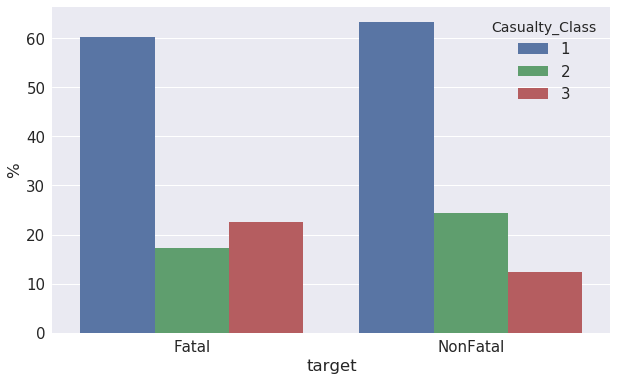

In [284]:
xx = 'target'
hh = 'Casualty_Class'
plot_qual(xx, hh)

Видно, что среди летальных исходов доля пешеходов больше, а пассажиров меньше, чем среди не летальных.

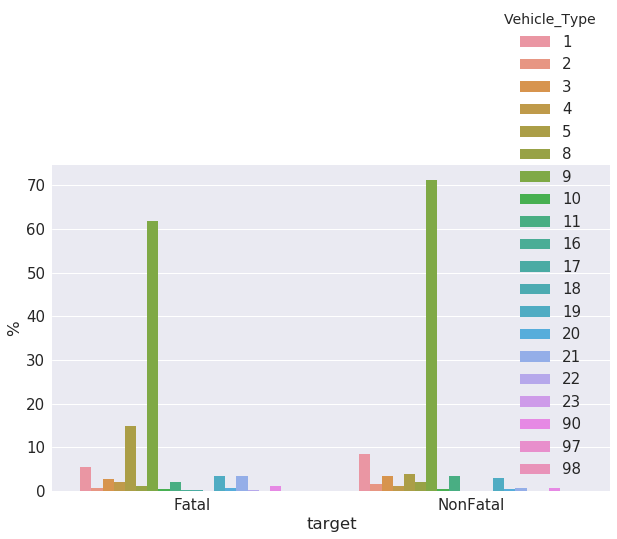

In [337]:
xx = 'target'
hh = 'Vehicle_Type'
plot_qual(xx, hh)

Тут ясности нет, так как классов очень много. Создадим отдельную переменную, в которой объединим все мотоциклы и все грузовые автомобили.

In [338]:
flt1 = df.Vehicle_Type.isin([1, 2, 3, 4, 5, 23, 97]) # мотоциклы
flt2 = df.Vehicle_Type.isin([8, 9]) # автомобили
flt3 = df.Vehicle_Type.isin([19, 20, 21, 98]) # грузовики
df['Vehicle_Type_simple'] = df.Vehicle_Type.copy()
df.loc[flt1, 'Vehicle_Type_simple'] = 1
df.loc[flt2, 'Vehicle_Type_simple'] = 2
df.loc[flt3, 'Vehicle_Type_simple'] = 3
df.loc[~(flt1 | flt2 | flt3), 'Vehicle_Type_simple'] = 4
df.Vehicle_Type_simple.value_counts()

2    1753663
1     443742
4     109809
3      95695
Name: Vehicle_Type_simple, dtype: int64

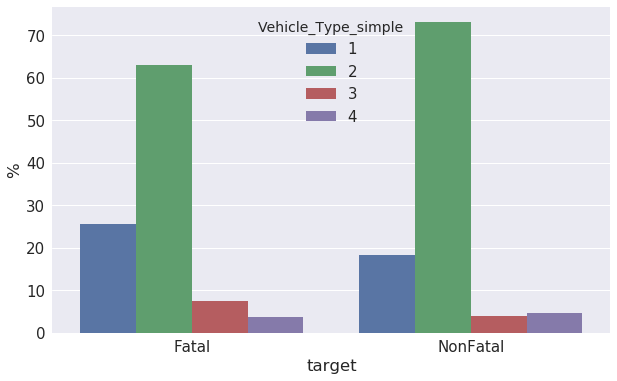

In [286]:
xx = 'target'
hh = 'Vehicle_Type_simple'
plot_qual(xx, hh)

Теперь видно, что среди смертельных исходов доля мотоциклов и грузовиков выше, а обычных машин
и остального вида транспорта меньше.

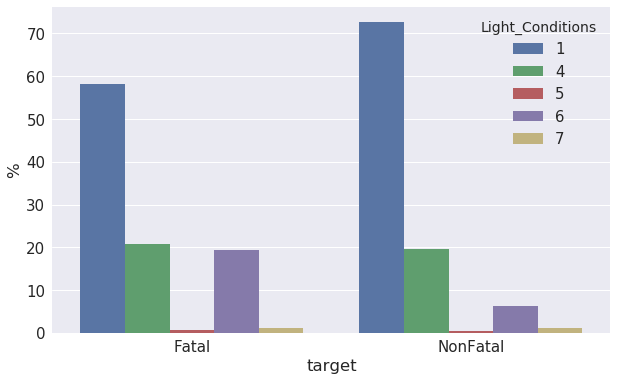

In [339]:
xx = 'target'
hh = 'Light_Conditions'
plot_qual(xx, hh)

Как можно было ожидать, днем доля смертельных исходов меньше, а ночью без дополнительного освещения - существенно больше.

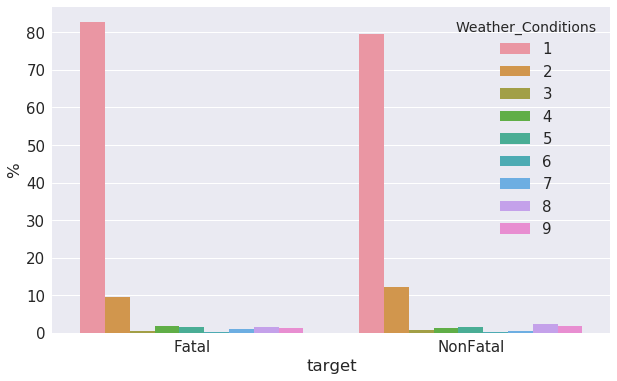

In [288]:
xx = 'target'
hh = 'Weather_Conditions'
plot_qual(xx, hh)

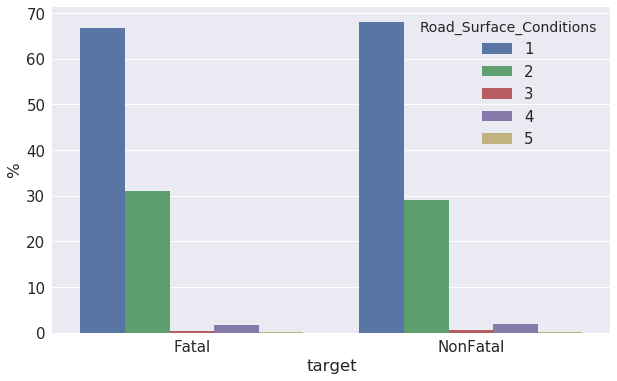

In [340]:
xx = 'target'
hh = 'Road_Surface_Conditions'
plot_qual(xx, hh)

Видно, что погода и дорожные условия также оказывают влияние на потенциальный исход. Дальше посмотрим на параметры, связанные с движением транспорта.

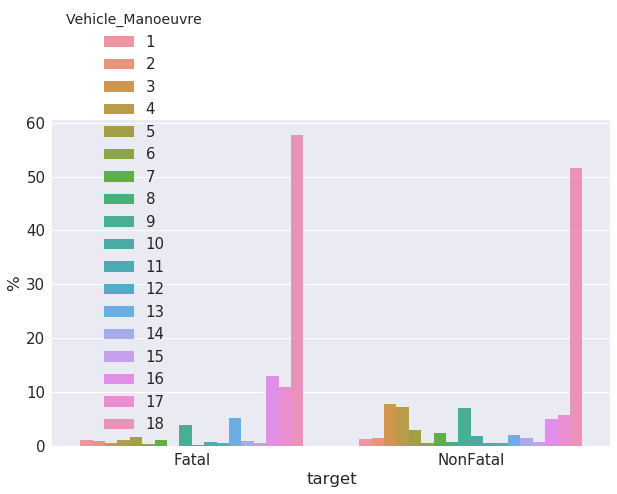

In [291]:
xx = 'target'
hh = 'Vehicle_Manoeuvre'
plot_qual(xx, hh)

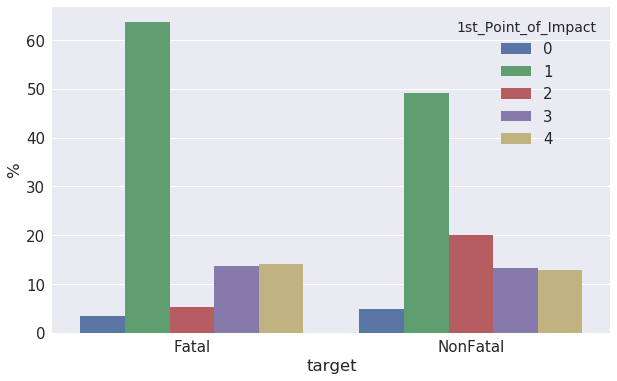

In [341]:
xx = 'target'
hh = '1st_Point_of_Impact'
plot_qual(xx, hh)

Видно, что меньше всего смертельных исходов в транспорте, для которого столкновение заднее, и больше всего - для которого оно переднее.

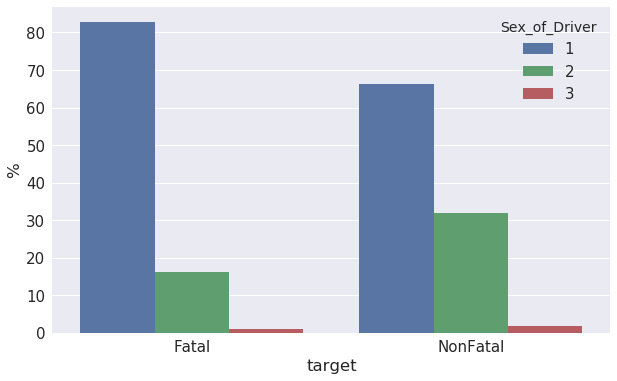

In [342]:
xx = 'target'
hh = 'Sex_of_Driver'
plot_qual(xx, hh)

Видно, что доля смертельных исходов меньше в случае, когда водитель - женщина. Теперь рассмотрим количественные признаки.

[Text(0,0,'Fatal'), Text(0,0,'NonFatal')]

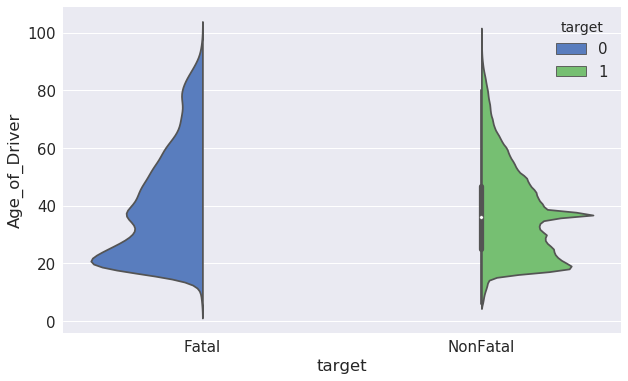

In [304]:
plt.figure(figsize=(10, 6)) 
ax = sns.violinplot(x="target", y="Age_of_Driver", hue='target',
               data=df, palette="muted", split=True)
ax.set_xticklabels(('Fatal', 'NonFatal'))

[Text(0,0,'Fatal'), Text(0,0,'NonFatal')]

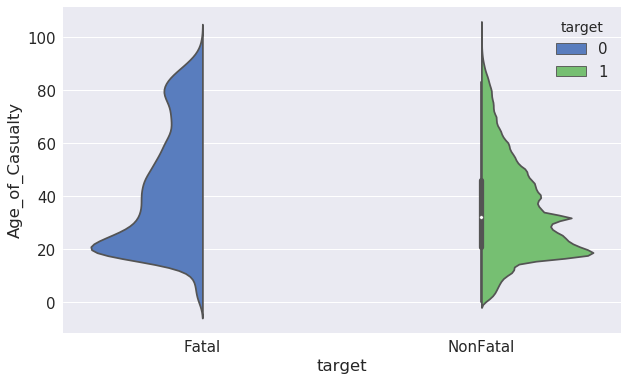

In [306]:
plt.figure(figsize=(10, 6)) 
ax = sns.violinplot(x="target", y="Age_of_Casualty", hue='target',
               data=df, palette="muted", split=True)
ax.set_xticklabels(('Fatal', 'NonFatal'))

Видим, что мода возрастов водителей, попадающих в аварию, а также остальных участников
дорожного движения составляет 20 лет.

## Выбор метрики и модели
Мы решаем задачу бинарной классификации, при этом классы сильно не сбалансированы (2378107 против 24802). Поэтому в качестве базовой метрики будем использовать ROC-AUC.

В качестве модели будем использовать логистическую регрессию, так как линейные модели хорошо подходят, когда имеется большое количество признаков, которое возникнет при OneHotEncoding. Кроме того, линейные модели достаточно хорошо интерпретируются с точки зрения важности параметров.

Сделаем отложенную выборку.

In [343]:
Xdf = df.copy()
y = Xdf.target
Xdf.drop(columns=['target', 'Casualty_Severity'], inplace=True)

In [351]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, y, test_size=0.33, 
                                                    random_state=1, stratify=y)

Сделаем pipeline. Создадим дополнительные классы для того, чтобы пайплайн принимал на входе dataframe.

In [366]:
class ItemSelector(BaseEstimator):
    def __init__(self, key):
        self.key = key
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, df):
        return df.loc[:, self.key].values.reshape(-1, 1)
    
def select_and_ohe(column_name):
    feature = (column_name, make_pipeline(
                        ItemSelector(column_name),
                        OneHotEncoder(handle_unknown='ignore')))
    return feature

def select_and_ohe_few(column_names):
    features = [select_and_ohe(col) for col in column_names]
    return features    

In [367]:
list_of_qual_params = list(Xdf.columns.values)
list_of_qual_params.remove('Age_of_Casualty')
list_of_qual_params.remove('Age_of_Driver')
list_of_qual_params.remove('Age_of_Vehicle')
# list_of_qual_params

In [368]:
pipe = Pipeline([
    ('data', FeatureUnion([
        
        # Features to OHE
        *select_and_ohe_few(list_of_qual_params),
        
        ('driver_age', make_pipeline(
            ItemSelector('Age_of_Driver'),
            StandardScaler()
        )),
        
        ('cas_age', make_pipeline(
            ItemSelector('Age_of_Casualty'),
            StandardScaler()
        )),
        
        ('speed_limit', make_pipeline(
            ItemSelector('Age_of_Vehicle'),
            StandardScaler()
        )),
        
    ])),
    ('logreg', LogisticRegression())
])

Подбираем оптимальные параметры регуляризации

In [385]:
fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

params = {'logreg__C': [0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(pipe, param_grid=params, scoring='roc_auc',
                 refit=True, verbose=3)

In [386]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] logreg__C=0.01 ..................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ......... logreg__C=0.01, score=0.8373794739902489, total=  11.3s
[CV] logreg__C=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ......... logreg__C=0.01, score=0.8360697329166953, total=  11.2s
[CV] logreg__C=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.1s remaining:    0.0s
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ......... logreg__C=0.01, score=0.8387238113540996, total=  11.2s
[CV] logreg__C=0.1 ...................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] .......... logreg__C=0.1, score=0.8388442217965324, total=  19.1s
[CV] logreg__C=0.1 ...................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] .......... logreg__C=0.1, score=0.8378436406363068, total=  19.5s
[CV] logreg__C=0.1 ...................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] .......... logreg__C=0.1, score=0.8402448159026166, total=  19.8s
[CV] logreg__C=1 .....................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ............ logreg__C=1, score=0.8381420757401854, total=  33.7s
[CV] logreg__C=1 .....................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ............ logreg__C=1, score=0.8374234577593396, total=  37.2s
[CV] logreg__C=1 .....................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ............ logreg__C=1, score=0.8391848945571687, total=  36.8s
[CV] logreg__C=10 ....................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ............ logreg__C=10, score=0.835618903575072, total= 1.4min
[CV] logreg__C=10 ....................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ........... logreg__C=10, score=0.8351750056478314, total= 1.3min
[CV] logreg__C=10 ....................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ........... logreg__C=10, score=0.8355433314339752, total= 1.2min
[CV] logreg__C=100 ...................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] .......... logreg__C=100, score=0.8314232532855047, total= 2.4min
[CV] logreg__C=100 ...................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] .......... logreg__C=100, score=0.8309686936049357, total= 2.2min
[CV] logreg__C=100 ...................................................


/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] .......... logreg__C=100, score=0.8294382228822161, total= 2.3min


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 15.0min finished
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('data', FeatureUnion(n_jobs=1,
       transformer_list=[('Casualty_Class', Pipeline(memory=None,
     steps=[('itemselector', ItemSelector(key='Casualty_Class')), ('onehotencoder', OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_valu...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

Рисуем кривую валидации

In [388]:
def plot_with_err(gs, x, **kwargs):
    score = gs.cv_results_
    mu_train = score['mean_train_score']
    std_train = score['std_train_score']
    mu_test = score['mean_test_score']
    std_test = score['std_test_score']

    fun = lambda x : np.log10(x)
#     fun = lambda x : x
    lines = plt.plot(fun(x), mu_train, '-', label='training scores', **kwargs)
    plt.fill_between(fun(x), mu_train - std_train, mu_train + std_train, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

    lines = plt.plot(fun(x), mu_test, '-', label='validation scores', **kwargs)
    plt.fill_between(fun(x), mu_test - std_test, mu_test + std_test, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2) 

/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Text(0.5,1,"train=0.842, cv=0.839, {'logreg__C': 0.1}")

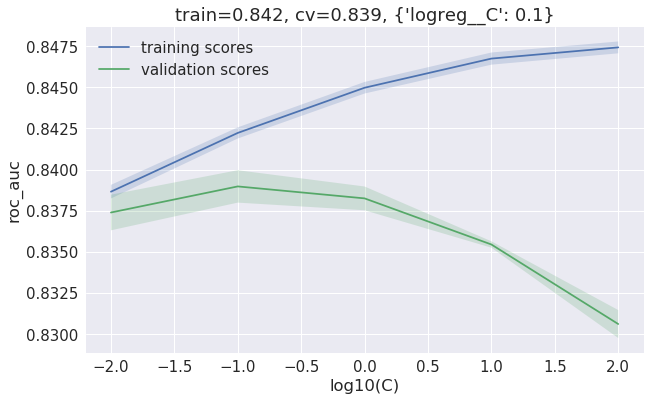

In [390]:
cv_score = gs.best_score_
i = int(np.argwhere(gs.cv_results_['mean_test_score'] == cv_score))
train_score = gs.cv_results_['mean_train_score'][i]

x = [0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(10, 6))          
plot_with_err(gs, x)
plt.xlabel('log10(C)'); plt.ylabel('roc_auc')
plt.legend();
plt.title('train={0:.3f}, cv={1:.3f}, {2}'.format(train_score, cv_score, gs.best_params_))

Теперь смотрим результат на отложенной выборке с лучшими параметрами регуляризации, выбранными на кросс валидации.

In [391]:
y_pred = gs.predict_proba(X_test)
final_score = roc_auc_score(y_test, y_pred[:, 1])

/home/zabkov/Apps/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [392]:
final_score

0.8381707143550341

Итого на отложенной выборке был получен результат, сравнимый с результатом кросс валидации. На базе разработанной модели может быть проведен анализ факторов, оказывающих влияние на риск летального исхода в автомобильных авариях. 